In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

2023-10-05 23:23:02.653108: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Task 1-a Generate random 1000 numbers from [0, 1]

In [2]:
N = 1000
X = np.random.rand(N)
y = np.sqrt(1 + X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


## Task 1-b Closed form solution

In [3]:
class LinearRegressionClosedForm:
    def __init__(self):
        self._X = None
        self._y = None
        self.__coefficients = None
        self.__intercept = None

    def fit(self, X, y):
        """
        Fit the model to the data.

        :param X: The feature matrix.
        :param y: The labels.
        """
        self._X = X
        self._y = y
        # Adding a column of ones to the feature matrix for the intercept term
        X_b = np.c_[np.ones((len(X), 1)), X]
        
        beta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(self._y) # closed-form solution

        self.__intercept = beta_hat[0]
        self.__coefficients = beta_hat[1:]

    def predict(self, X):
        """
        Make predictions for new data.

        :param X: The feature matrix for new data.
        :return: The predictions.
        """
        # Ensure the model has been fitted
        if self.__coefficients is None or self.__intercept is None:
            raise Exception("The model has not been fitted yet.")

        X_b = np.c_[np.ones((len(X), 1)), X]

        return X_b.dot(np.concatenate(([self.__intercept], self.__coefficients)))

    def plot(self, X, y):
        """
        Plot the data points and the fitted line.
        """
        # Ensure the model has been fitted
        if self._X is None or self._y is None:
            raise Exception("The model has not been fitted yet.")
        plt.scatter(X, y, color='blue', label='Original data')
        y_new = self.predict(X)
        plt.plot(X, y_new, color='red', label='Fitted line')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title('Data Points and Fitted Line')
        plt.legend()
        plt.show()

    @property
    def coefficients(self):
        """
        Get the coefficients of the fitted model.

        :return: The coefficients.
        """
        # Ensure the model has been fitted
        if self.__coefficients is None:
            raise Exception("The model has not been fitted yet.")
        return self.__coefficients

    @property
    def intercept(self):
        """
        Get the intercept of the fitted model.

        :return: The intercept.
        """
        # Ensure the model has been fitted
        if self.__intercept is None:
            raise Exception("The model has not been fitted yet.")
        return self.__intercept

In [4]:
regressor = LinearRegressionClosedForm()
regressor.fit(X_train.reshape(-1, 1), y_train)

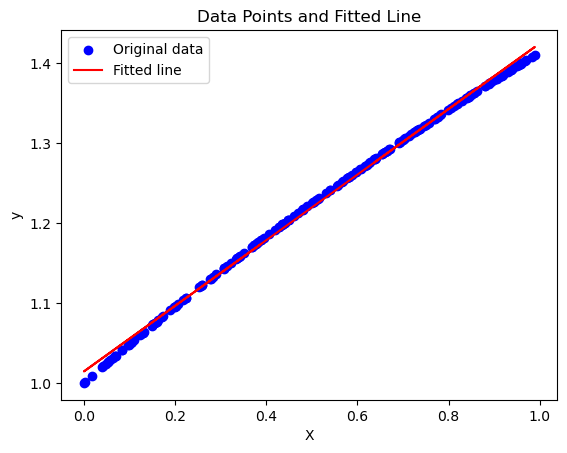

Coefficients: [0.41001118]
Intercept: 1.014417780279455


In [5]:
regressor.plot(X_val, y_val)

print(f"Coefficients: {regressor.coefficients}")
print(f"Intercept: {regressor.intercept}")


## Task 1-c Sklearn regression tryout

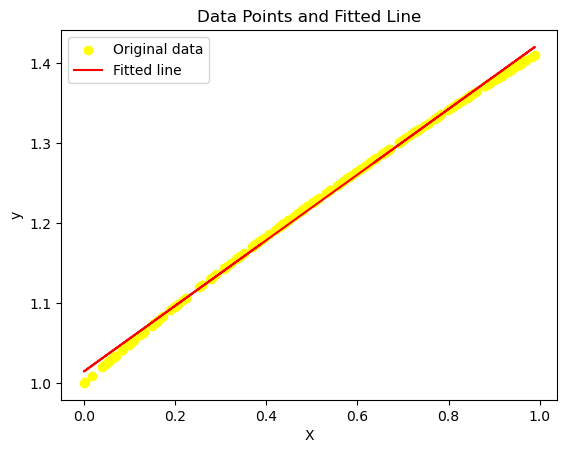

Coefficients: [0.41001118]
Intercept: 1.0144177802794545


In [6]:
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)

# Plotting the data points and fitted line
plt.scatter(X_val, y_val, color='yellow', label='Original data')
plt.plot(X_val, model.predict(X_val.reshape(-1, 1)), color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data Points and Fitted Line')
plt.legend()
plt.show()

# Output the coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")



## Task 1-d Linear regression using gradient descent

In [7]:
class LinearRegressionGradientDescent:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self._X = None
        self._y = None
        self.__weights = None
        self.__bias = None
        self.__learning_rate = learning_rate
        self.__epochs = epochs

    def fit(self, X, y):
        """
        Fit the model to the data using gradient descent.

        :param X: The feature matrix.
        :param y: The labels.
        """
        self._X = X
        self._y = y
        self.__weights = np.zeros(X.shape[1])
        self.__bias = 0

        for _ in range(self.__epochs):
            self.__bias, self.__weights = self.__update_weights()

    def __update_weights(self):
        y_pred = self.predict(self._X)
        error = self._y - y_pred
        bias_gradient = -2 * np.sum(error) / len(self._X)
        weights_gradient = -2 * np.dot(error, self._X) / len(self._X)

        new_intercept = self.__bias - self.__learning_rate * bias_gradient
        new_weights = self.__weights - self.__learning_rate * weights_gradient

        return new_intercept, new_weights

    def predict(self, X):
        """
        Make predictions for new data.

        :param X: The feature matrix for new data.
        :return: The predictions.
        """
        # Ensure the model has been fitted
        if self.__weights is None or self.__bias is None:
            raise Exception("The model has not been fitted yet.")

        return self.__bias + np.dot(X, self.__weights)

    def plot(self, X, y):
        """
        Plot the data points and the fitted line.

        """
        plt.scatter(X, y, color='green', label='Original data')
        y_new = self.predict(X)
        plt.plot(X, y_new, color='red', label='Fitted line')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title('Data Points and Fitted Line')
        plt.legend()
        plt.show()

    @property
    def weights(self):
        """
        Get the coefficients of the fitted model.

        :return: The coefficients.
        """
        if self.__weights is None:
            raise Exception("The model has not been fitted yet.")

        return self.__weights

    @property
    def bias(self):
        """
        Get the bias of the fitted model.

        :return: The bias.
        """
        if self.__bias is None:
            raise Exception("The model has not been fitted yet.")

        return self.__bias


In [8]:
regressor_gd = LinearRegressionGradientDescent(epochs=1000)
regressor_gd.fit(X_train.reshape(-1, 1), y_train)

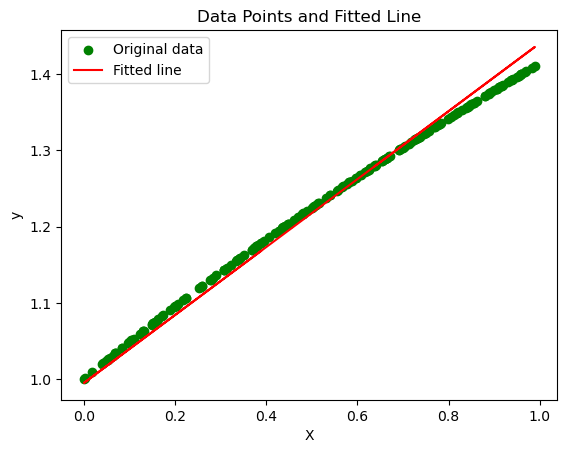

Coefficients: [0.44490326]
Intercept: 0.9951411950376932


In [9]:
regressor_gd.plot(X_val.reshape(-1,1), y_val)

print(f"Coefficients: {regressor_gd.weights}")
print(f"Intercept: {regressor_gd.bias}")

## Task 1-e TF regression

Epoch 1/1000
19/19 [==============================] - 0s 705us/step - loss: 0.4204
Epoch 2/1000
19/19 [==============================] - 0s 446us/step - loss: 0.1835
Epoch 3/1000
19/19 [==============================] - 0s 480us/step - loss: 0.0941
Epoch 4/1000
19/19 [==============================] - 0s 456us/step - loss: 0.0599
Epoch 5/1000
19/19 [==============================] - 0s 451us/step - loss: 0.0459
Epoch 6/1000
19/19 [==============================] - 0s 441us/step - loss: 0.0397
Epoch 7/1000
19/19 [==============================] - 0s 405us/step - loss: 0.0365
Epoch 8/1000
19/19 [==============================] - 0s 412us/step - loss: 0.0343
Epoch 9/1000
19/19 [==============================] - 0s 411us/step - loss: 0.0325
Epoch 10/1000
19/19 [==============================] - 0s 403us/step - loss: 0.0310
Epoch 11/1000
19/19 [==============================] - 0s 399us/step - loss: 0.0296
Epoch 12/1000
19/19 [==============================] - 0s 414us/step - loss: 0.0283
E

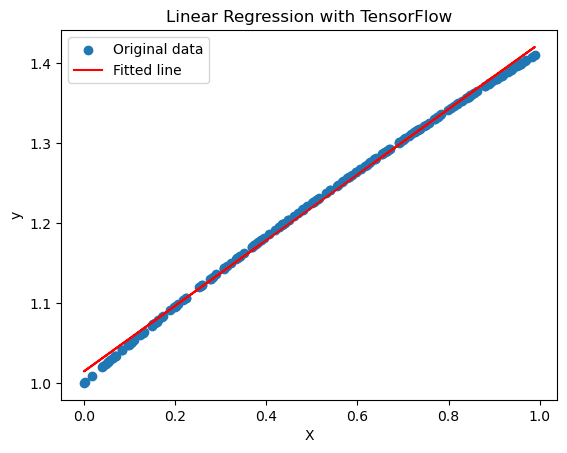

In [10]:
model_tf = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model_tf.compile(optimizer='sgd', loss='mean_squared_error')
model_tf.fit(X_train, y_train, epochs=1000)
predictions = model_tf.predict(X_val)

weights, biases = model_tf.layers[0].get_weights()
print(f"Weights: {weights[0][0]}")
print(f"Biases: {biases[0]}")

# Plot the original data and the regression line
plt.scatter(X_val, y_val, label='Original data')
plt.plot(X_val, predictions, color='red', label='Fitted line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with TensorFlow")
plt.legend()
plt.show()


## Task 1-f SGD

In [11]:
class LinearRegressionSGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self._X = None
        self._y = None
        self.__learning_rate = learning_rate
        self.__epochs = epochs
        self.__weights = None
        self.__bias = None

    def fit(self, X, y):
        self._X = X
        self._y = y
        self.__weights = np.zeros(X.shape[1])
        self.__bias = 0

        num_samples = len(y)

        for _ in range(self.__epochs):
            for idx in np.random.permutation(num_samples):
                xi = X[idx:idx+1]
                yi = y[idx:idx+1]
                prediction = np.dot(xi, self.__weights) + self.__bias

                # Update rules
                self.__weights -= self.__learning_rate * (-2/num_samples) * (xi * (yi - prediction)).sum()
                self.__bias -= self.__learning_rate * (-2/num_samples) * (yi - prediction).sum()

    def predict(self, X):
        return np.dot(X, self.__weights) + self.__bias

    def plot(self, X, y):
        plt.scatter(X, y, color='blue', label='Original data')
        plt.plot(X, self.predict(X), color='red', label='Fitted line')
        plt.xlabel("X")
        plt.ylabel("y")
        plt.title("Fit of the model")
        plt.legend()
        plt.show()

    @property
    def weights(self):
        """
        Get the coefficients of the fitted model.

        :return: The coefficients.
        """
        if self.__weights is None:
            raise Exception("The model has not been fitted yet.")

        return self.__weights

    @property
    def bias(self):
        """
        Get the bias of the fitted model.

        :return: The bias.
        """
        if self.__bias is None:
            raise Exception("The model has not been fitted yet.")

        return self.__bias


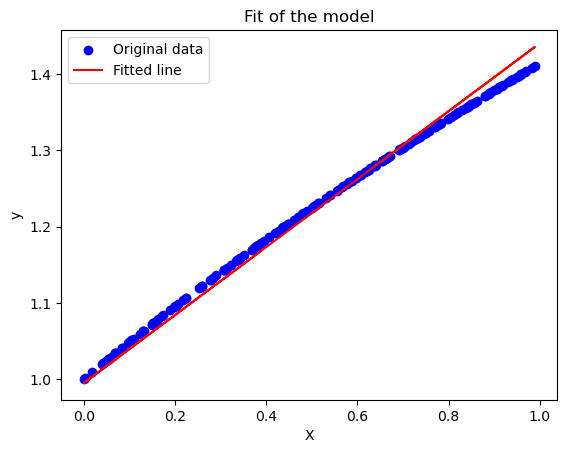

Weights: [0.44492439]
Biases: 0.995129092246136


In [12]:
model_sgd = LinearRegressionSGD(learning_rate=0.01, epochs=1000)
model_sgd.fit(X_train.reshape(-1, 1), y_train)

model_sgd.plot(X_val.reshape(-1,1), y_val)

print(f"Weights: {model_sgd.weights}")
print(f"Biases: {model_sgd.bias}")

## Task 1-g Mini-Batch GD

In [13]:
class LinearRegressionMiniBatchSGD:
    def __init__(self, learning_rate=0.01, epochs=1000, batch_size=10):
        self._X = None
        self._y = None
        self.__learning_rate = learning_rate
        self.__epochs = epochs
        self.__batch_size = batch_size
        self.__weights = None
        self.__bias = None

    def fit(self, X, y):
        self._X = X
        self._y = y
        self.__weights = np.zeros(X.shape[1])
        self.__bias = 0

        num_samples = len(y)

        for _ in range(self.__epochs):
            shuffled_indices = np.random.permutation(num_samples)
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, num_samples, self.__batch_size):
                X_mini_batch = X_shuffled[i:i+self.__batch_size]
                y_mini_batch = y_shuffled[i:i+self.__batch_size]

                predictions = np.dot(X_mini_batch, self.__weights) + self.__bias

                weights_gradient = (-2/len(X_mini_batch)) * np.dot(X_mini_batch.T, (y_mini_batch - predictions))
                bias_gradient = (-2/len(X_mini_batch)) * np.sum(y_mini_batch - predictions)

                self.__weights -= self.__learning_rate * weights_gradient
                self.__bias -= self.__learning_rate * bias_gradient


    def predict(self, X):
        return np.dot(X, self.__weights) + self.__bias

    def plot(self, X, y):
        plt.scatter(X, y, color='blue', label='Original data')
        plt.plot(X, self.predict(X), color='red', label='Fitted line')
        plt.xlabel("X")
        plt.ylabel("y")
        plt.title("Fit of the model using Mini-Batch Gradient Descent")
        plt.legend()
        plt.show()

    @property
    def weights(self):
        if self.__weights is None:
            raise Exception("The model has not been fitted yet.")
        return self.__weights

    @property
    def bias(self):
        if self.__bias is None:
            raise Exception("The model has not been fitted yet.")
        return self.__bias

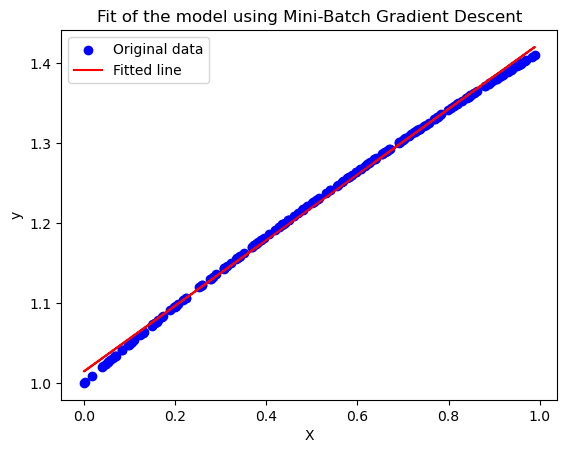

Weights: [0.4099896]
Biases: 1.0143927905217236


In [14]:
model_mbgd = LinearRegressionMiniBatchSGD(learning_rate=0.01, epochs=1000, batch_size=10)
model_mbgd.fit(X_train.reshape(-1, 1), y_train)

model_mbgd.plot(X_val.reshape(-1,1), y_val)

print(f"Weights: {model_mbgd.weights}")
print(f"Biases: {model_mbgd.bias}")

## Task 1-h Plotting

7/7 [==============================] - 0s 510us/step


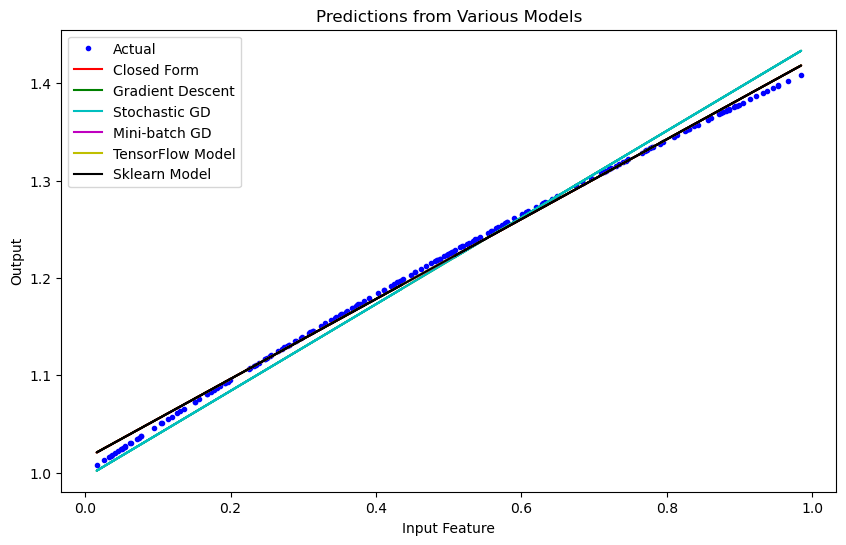

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, 'b.', label='Actual')
plt.plot(X_test, regressor.predict(X_test), 'r-', label='Closed Form')
plt.plot(X_test, regressor_gd.predict(X_test.reshape(-1,1)), 'g-', label='Gradient Descent')
plt.plot(X_test, model_sgd.predict(X_test.reshape(-1,1)), 'c-', label='Stochastic GD')
plt.plot(X_test, model_mbgd.predict(X_test.reshape(-1,1)), 'm-', label='Mini-batch GD')
plt.plot(X_test, model_tf.predict(X_test), 'y-', label='TensorFlow Model')
plt.plot(X_test, model.predict(X_test.reshape(-1,1)), 'k-', label='Sklearn Model')

plt.xlabel('Input Feature')
plt.ylabel('Output')
plt.title('Predictions from Various Models')
plt.legend()
plt.show()


## Task 1-i Taylor approximation

 Choosing $a = 0.5$ for the Taylor series expansion in the context of a uniform distribution on $[0, 1]$ is motivated by the fact that this is the expected value of a random variable with this distribution. This choice aims to minimize the average error of the approximation when $x$ is drawn from this distribution.


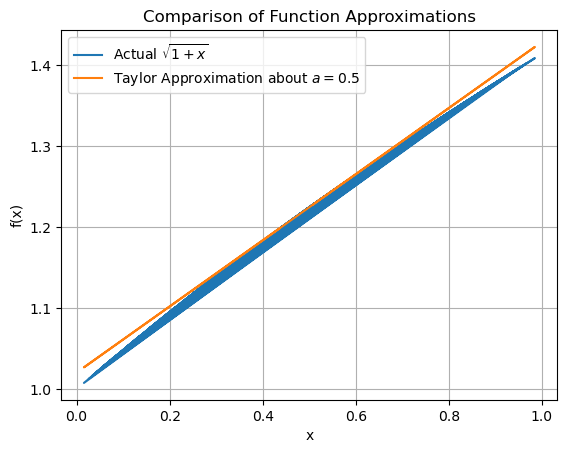

In [16]:
taylor_y = np.sqrt(1.5) + (X_test - 0.5)/(2*np.sqrt(1.5))


plt.plot(X_test, y_test, label="Actual $\sqrt{1 + x}$")
plt.plot(X_test, taylor_y, label="Taylor Approximation about $a=0.5$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Comparison of Function Approximations")
plt.grid(True)
plt.show()

## Task 1-i Comparison of the Models

In [17]:
predictions_closed_form = regressor.predict(X_test)
predictions_gd = regressor_gd.predict(X_test.reshape(-1,1))
predictions_sgd = model_sgd.predict(X_test.reshape(-1,1))
predictions_mbgd = model_mbgd.predict(X_test.reshape(-1,1))
predictions_tf = model_tf.predict(X_test)
predictions_sklearn = model.predict(X_test.reshape(-1,1))

predictions = [predictions_closed_form, predictions_gd, predictions_sgd,
               predictions_mbgd, predictions_tf, predictions_sklearn, taylor_y]
model_names = ['Closed Form', 'Gradient Descent', 'Stochastic GD',
               'Mini-batch GD', 'TensorFlow Model', 'Sklearn Model', 'Taylor approximation']

for pred, name in zip(predictions, model_names):
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)

    print(f"{name}:")
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}\n")

7/7 [==============================] - 0s 480us/step
Closed Form:
MAE: 0.00, MSE: 0.00, RMSE: 0.01

Gradient Descent:
MAE: 0.01, MSE: 0.00, RMSE: 0.01

Stochastic GD:
MAE: 0.01, MSE: 0.00, RMSE: 0.01

Mini-batch GD:
MAE: 0.00, MSE: 0.00, RMSE: 0.01

TensorFlow Model:
MAE: 0.00, MSE: 0.00, RMSE: 0.01

Sklearn Model:
MAE: 0.00, MSE: 0.00, RMSE: 0.01

Taylor approximation:
MAE: 0.01, MSE: 0.00, RMSE: 0.01

